In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Optional: Set style
sns.set(style='whitegrid')

In [2]:
# Load datasets
games_df = pd.read_csv('games.csv')
sales_df = pd.read_csv('vgsales.csv')

In [3]:
games_df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [4]:
sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
games_df.isna().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [6]:
sales_df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
# Drop rows with missing essential info
games_df.dropna(subset=["Rating", "Team", "Summary"], inplace=True)
sales_df.dropna(subset=["Year", "Publisher"], inplace=True)

In [10]:
# Remove unwanted column
games_df.drop(columns=["Unnamed: 0"], inplace=True)

In [11]:
# Convert 'Release Date' to datetime
games_df['Release Date'] = pd.to_datetime(games_df['Release Date'], errors='coerce')

In [12]:
# Clean numeric-like strings (like '21K', '3.8K') and convert to integers
def convert_k(val):
    if isinstance(val, str) and 'K' in val:
        return int(float(val.replace('K', '')) * 1000)
    try:
        return int(val)
    except:
        return np.nan

for col in ["Times Listed", "Number of Reviews", "Plays", "Playing", "Backlogs", "Wishlist"]:
    games_df[col] = games_df[col].apply(convert_k)

In [13]:
# Final check for missing values after transformation
games_df.dropna(inplace=True)
sales_df.dropna(inplace=True)

In [14]:
# Ensure 'Year' is integer
sales_df['Year'] = sales_df['Year'].astype(int)

In [15]:
sales_df.rename(columns={'Name': 'Title'}, inplace=True)

# Normalize game titles
games_df['Title'] = games_df['Title'].str.strip().str.lower()
sales_df['Title'] = sales_df['Title'].str.strip().str.lower()

In [16]:
games_df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,elden ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,the legend of zelda: breath of the wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,hollow knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


In [17]:
sales_df.head()

,Rank,Title,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,wii sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,super mario bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,mario kart wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,wii sports resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,pokemon red/pokemon blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [24]:
import sqlite3

# Create SQLite DB
conn = sqlite3.connect('videogames.db')

In [25]:
# Save tables
games_df.to_sql('games', conn, if_exists='replace', index=False)
sales_df.to_sql('vgsales', conn, if_exists='replace', index=False)

16291

In [26]:
# Optional: run PRAGMA to enable foreign keys
conn.execute('PRAGMA foreign_keys = ON;')

conn.commit()
conn.close()

# EDA & VISUALIZATIONS

1. What are the top-rated games by user reviews?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\4087807935.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x='Rating', y='Title', palette='viridis')


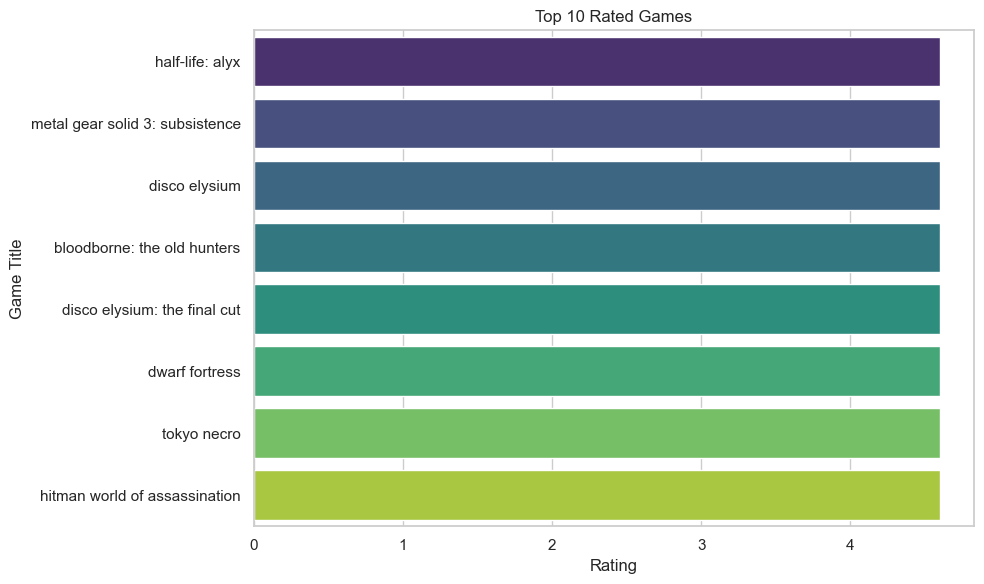

In [19]:
top_rated = games_df.sort_values(by='Rating', ascending=False).dropna(subset=['Rating']).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated, x='Rating', y='Title', palette='viridis')
plt.title('Top 10 Rated Games')
plt.xlabel('Rating')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()


2. Which developers (Teams) have the highest average ratings?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\3363311795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams, x='Rating', y='Team', palette='coolwarm')


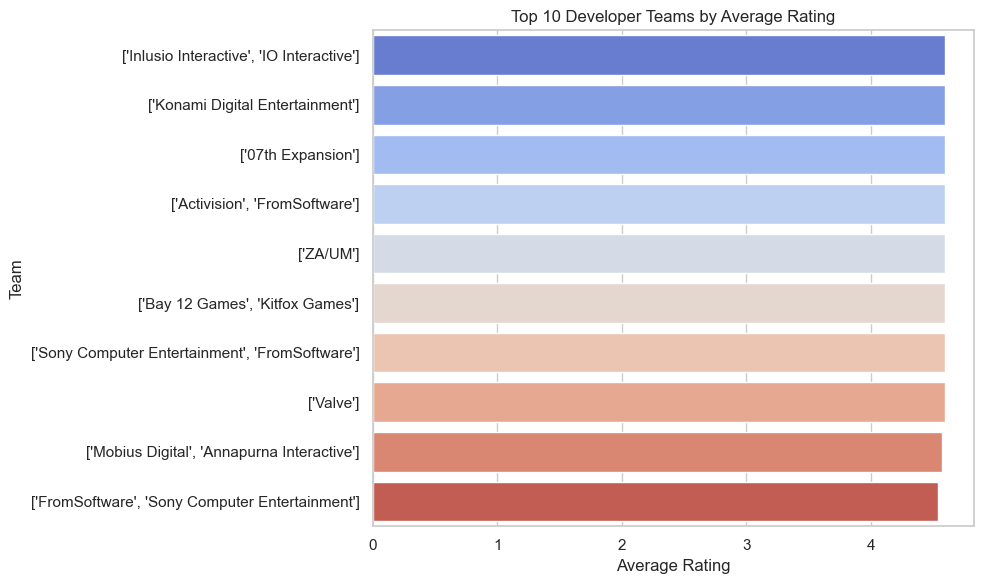

In [20]:
top_teams = games_df.groupby('Team')['Rating'].mean().dropna().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_teams, x='Rating', y='Team', palette='coolwarm')
plt.title('Top 10 Developer Teams by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


3. What are the most common genres in the dataset?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\2968486766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set2')


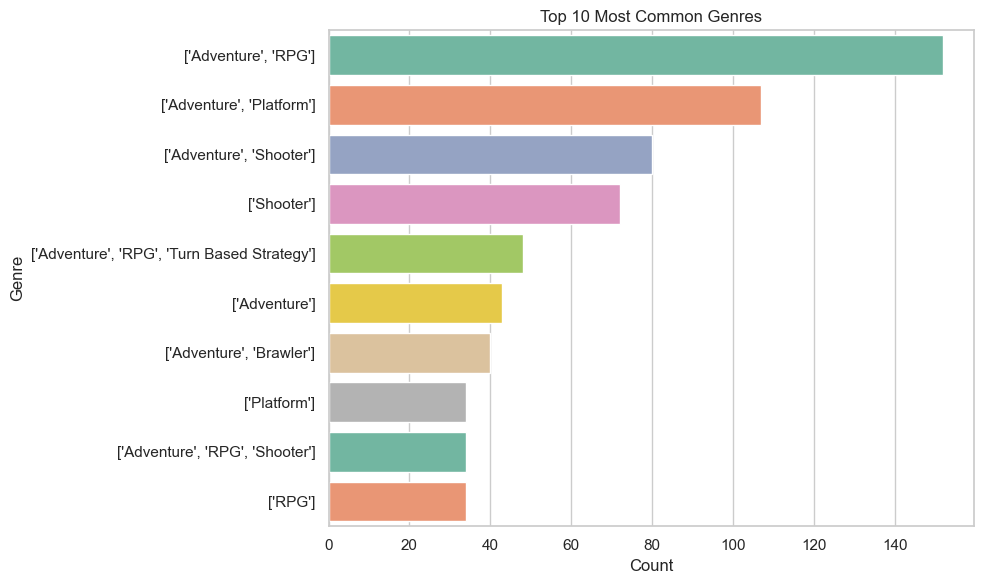

In [21]:
genre_series = games_df['Genres'].dropna().str.split(';')
all_genres = [genre.strip() for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set2')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


4. Which games have the highest backlog compared to wishlist?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\3672186052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_backlog_ratio, x='Backlog_to_Wishlist', y='Title', palette='mako')


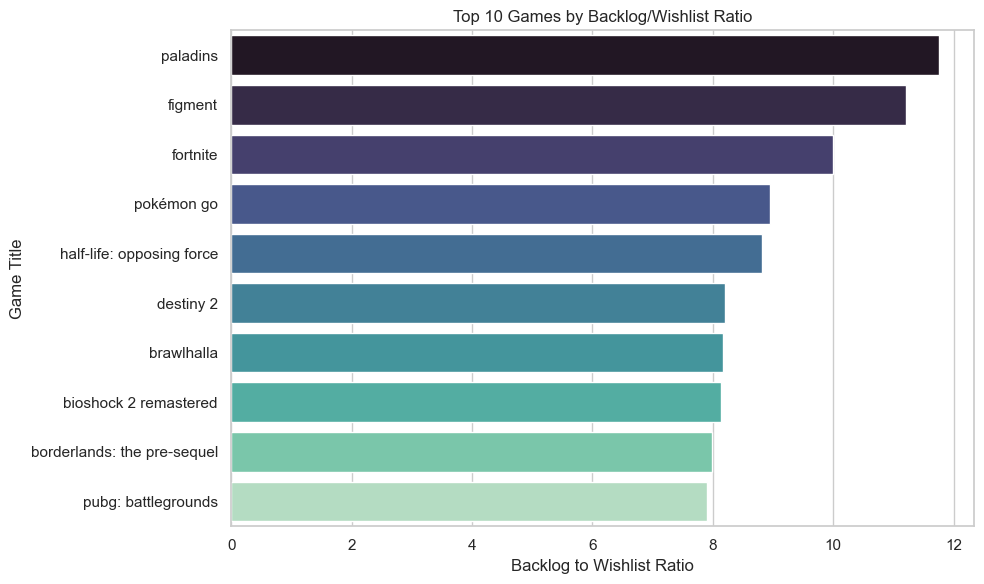

In [22]:
games_df['Backlog_to_Wishlist'] = games_df['Backlogs'] / games_df['Wishlist']
top_backlog_ratio = games_df[['Title', 'Backlogs', 'Wishlist', 'Backlog_to_Wishlist']].dropna()
top_backlog_ratio = top_backlog_ratio.sort_values(by='Backlog_to_Wishlist', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_backlog_ratio, x='Backlog_to_Wishlist', y='Title', palette='mako')
plt.title('Top 10 Games by Backlog/Wishlist Ratio')
plt.xlabel('Backlog to Wishlist Ratio')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()


5. What is the game release trend across years?

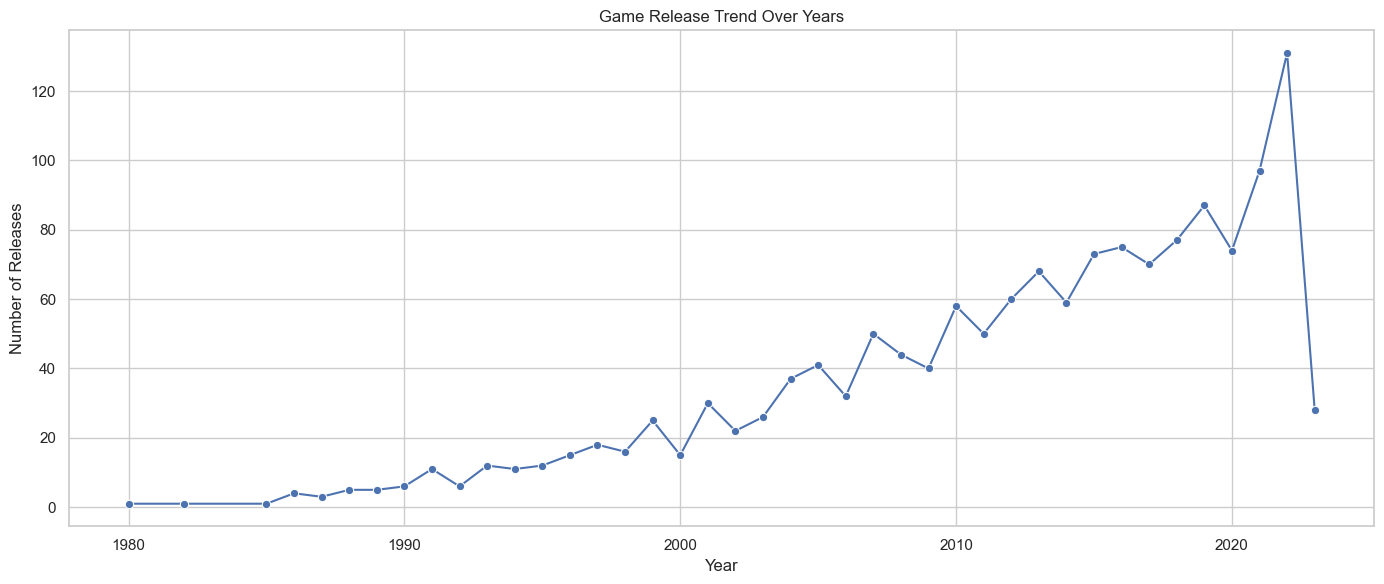

In [23]:
games_df['Release Date'] = pd.to_datetime(games_df['Release Date'], errors='coerce')
games_df['Release Year'] = games_df['Release Date'].dt.year
release_trend = games_df['Release Year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o')
plt.title('Game Release Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.tight_layout()
plt.show()


6. What is the distribution of user ratings?

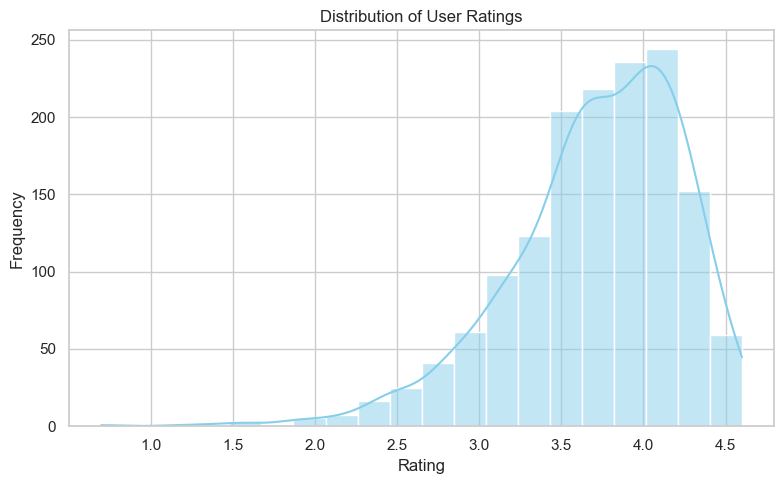

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(games_df['Rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


7. What are the top 10 most wishlisted games?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\916152057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_wishlist, x='Wishlist', y='Title', palette='flare')


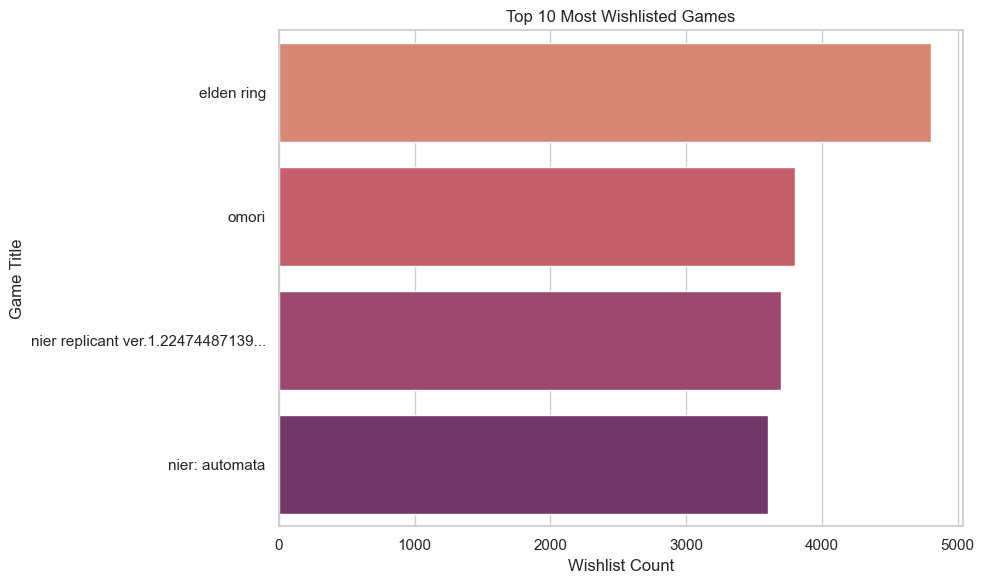

In [25]:
top_wishlist = games_df.sort_values(by='Wishlist', ascending=False).dropna(subset=['Wishlist']).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_wishlist, x='Wishlist', y='Title', palette='flare')
plt.title('Top 10 Most Wishlisted Games')
plt.xlabel('Wishlist Count')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()


8. What’s the average number of plays per genre?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\2379657901.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_plays_per_genre.values, y=avg_plays_per_genre.index, palette='cubehelix')


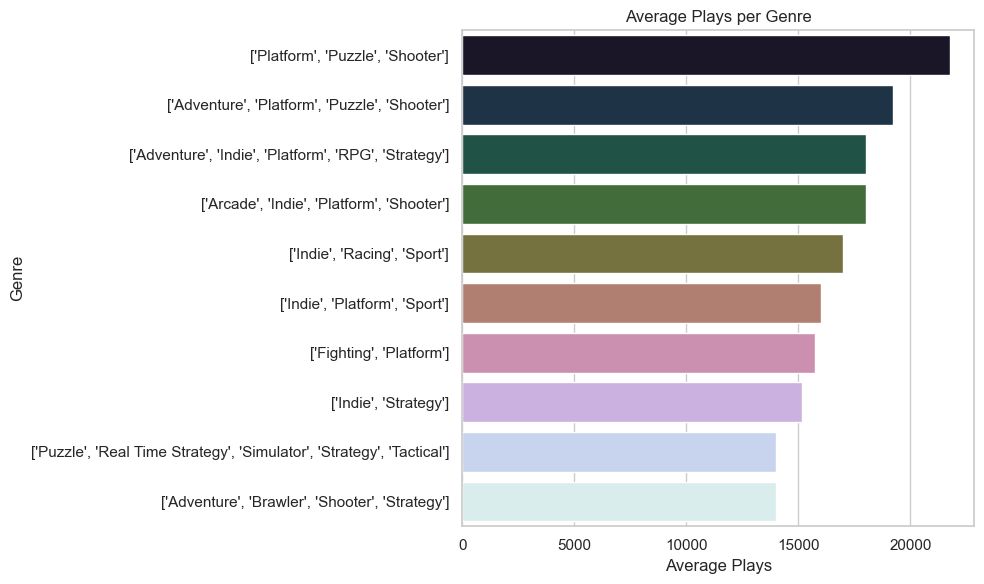

In [26]:
genre_play_df = games_df.dropna(subset=['Genres', 'Plays']).copy()
genre_play_df['Genres'] = genre_play_df['Genres'].str.split(';')
genre_play_df = genre_play_df.explode('Genres')
genre_play_df['Genres'] = genre_play_df['Genres'].str.strip()

avg_plays_per_genre = genre_play_df.groupby('Genres')['Plays'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_plays_per_genre.values, y=avg_plays_per_genre.index, palette='cubehelix')
plt.title('Average Plays per Genre')
plt.xlabel('Average Plays')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


9. Which developer studios are the most productive and impactful?

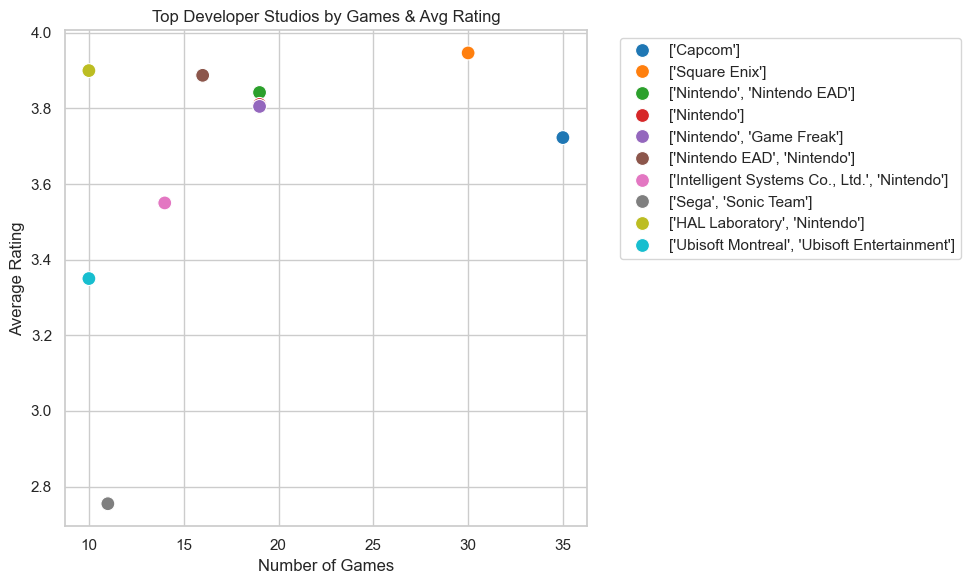

In [27]:
developer_stats = games_df.groupby('Team').agg({
    'Title': 'count',
    'Rating': 'mean'
}).rename(columns={'Title': 'Game_Count', 'Rating': 'Avg_Rating'}).dropna()

top_devs = developer_stats.sort_values(by=['Game_Count', 'Avg_Rating'], ascending=[False, False]).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_devs, x='Game_Count', y='Avg_Rating', hue='Team', palette='tab10', s=100)
plt.title('Top Developer Studios by Games & Avg Rating')
plt.xlabel('Number of Games')
plt.ylabel('Average Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


10. Which region generates the most game sales?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\583752675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_totals.index, y=region_totals.values, palette='muted')


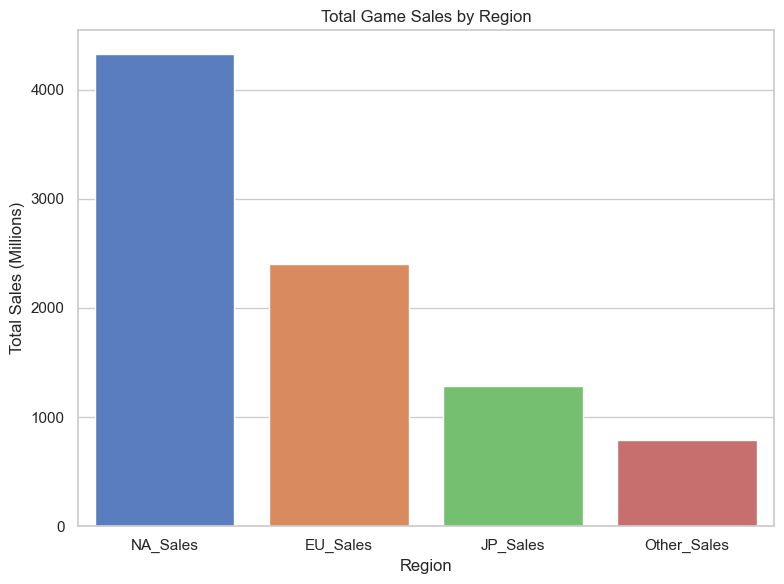

In [28]:
region_totals = sales_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=region_totals.index, y=region_totals.values, palette='muted')
plt.title('Total Game Sales by Region')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


11. What are the best-selling platforms?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\2298342019.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='pastel')


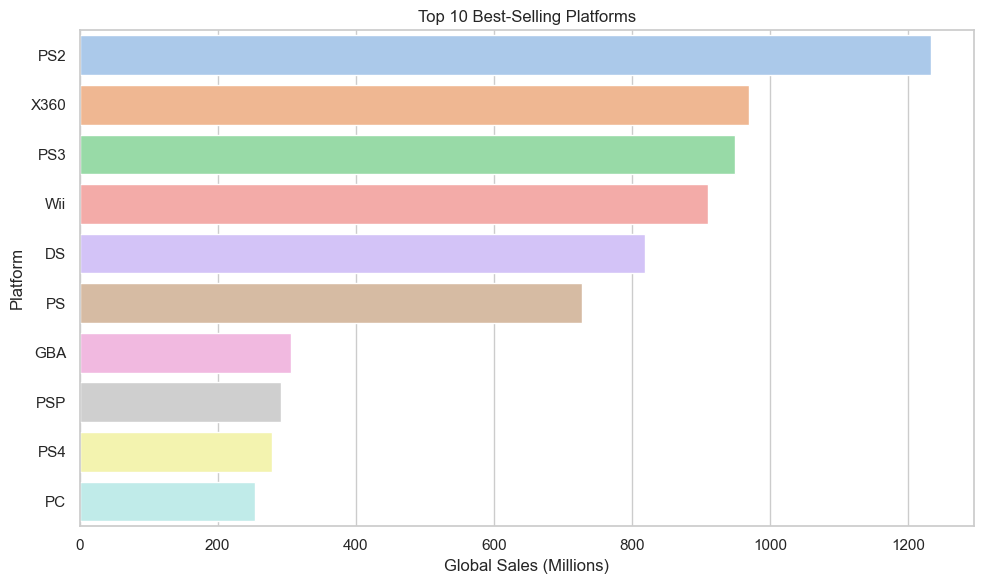

In [29]:
platform_sales = sales_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='pastel')
plt.title('Top 10 Best-Selling Platforms')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()


12. What’s the trend of game releases and sales over years?

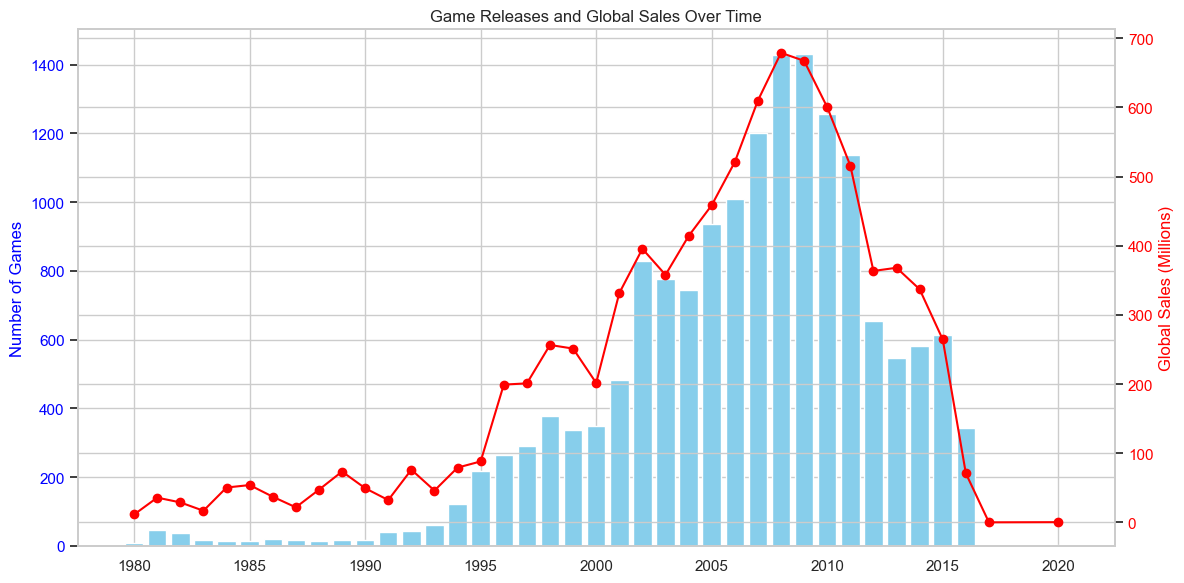

In [31]:
sales_by_year = sales_df.groupby('Year').agg({'Title': 'count', 'Global_Sales': 'sum'}).dropna()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Game Releases and Global Sales Over Time')
ax1.bar(sales_by_year.index, sales_by_year['Title'], color='skyblue', label='Number of Games')
ax1.set_ylabel('Number of Games', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(sales_by_year.index, sales_by_year['Global_Sales'], color='red', marker='o', label='Global Sales')
ax2.set_ylabel('Global Sales (Millions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.show()


13. Who are the top publishers by sales?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\2867828160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')


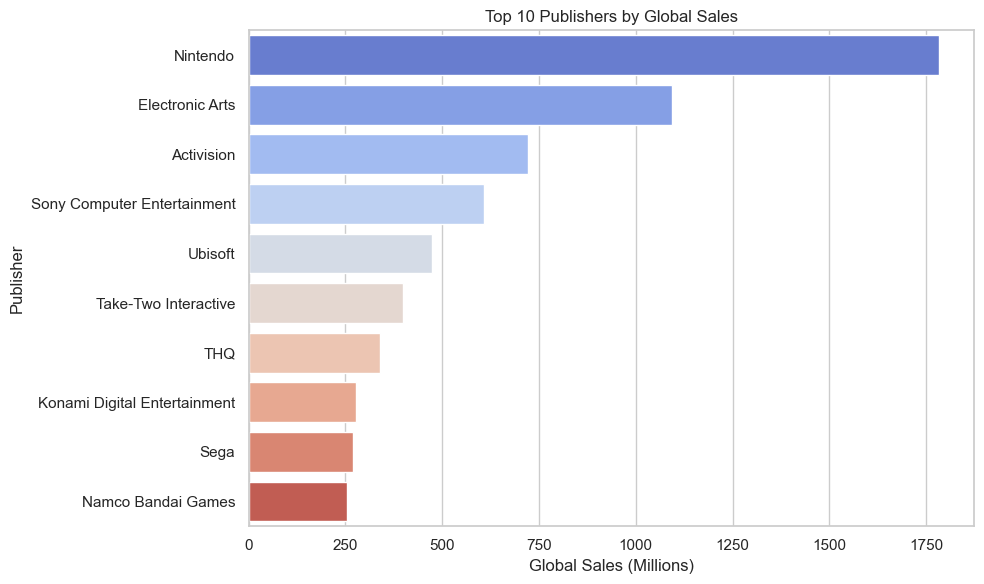

In [32]:
top_publishers = sales_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


14. Which games are the top 10 best-sellers globally?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\2690427707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_games['Global_Sales'], y=top_games['Title'], palette='magma')


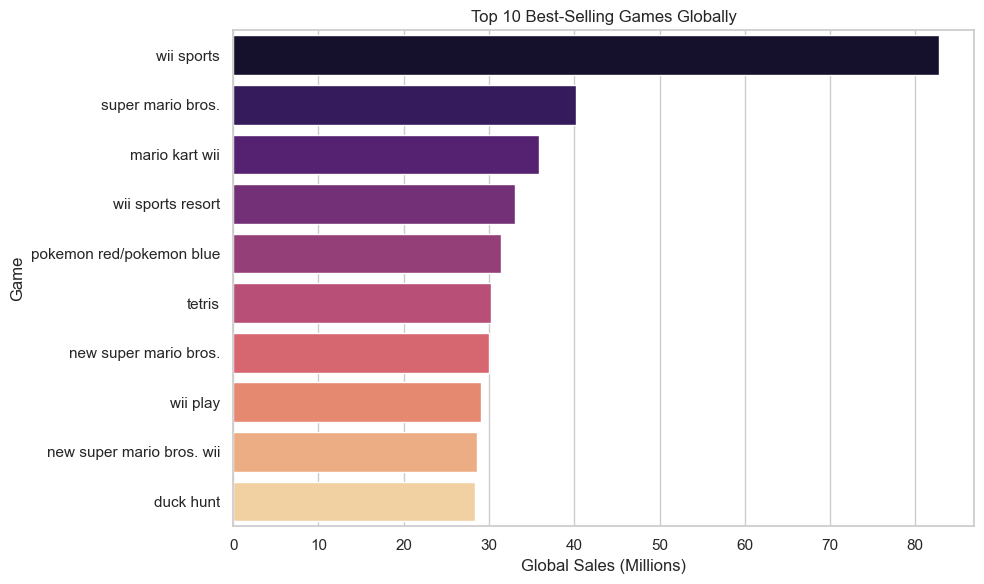

In [34]:
top_games = sales_df.sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_games['Global_Sales'], y=top_games['Title'], palette='magma')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game')
plt.tight_layout()
plt.show()


15. How do regional sales compare for specific platforms?

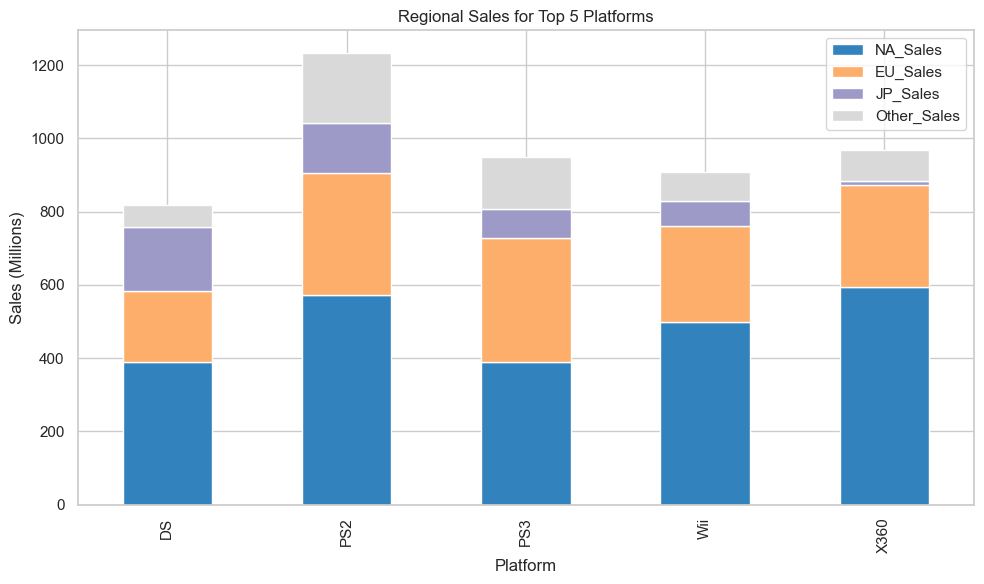

In [35]:
top_platforms = sales_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5).index
regional_sales = sales_df[sales_df['Platform'].isin(top_platforms)]
regional_grouped = regional_sales.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

regional_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Regional Sales for Top 5 Platforms')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()


16. How has the market evolved by platform over time?

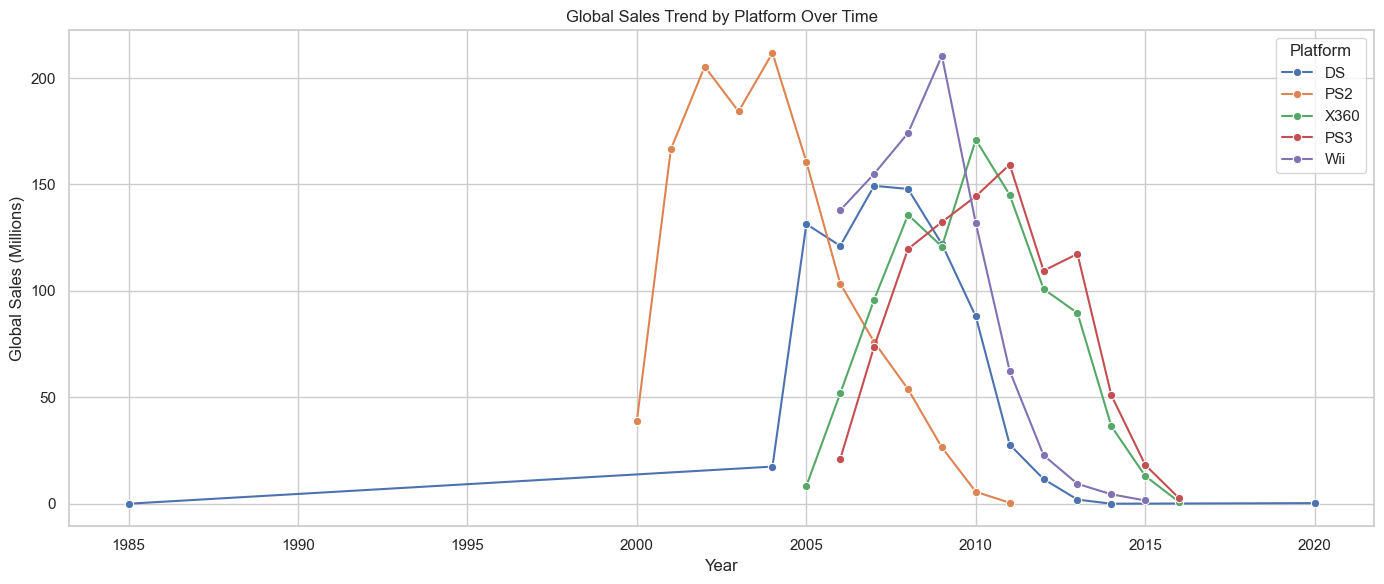

In [36]:
platform_yearly = sales_df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
top_platforms = platform_sales.head(5).index
platform_yearly = platform_yearly[platform_yearly['Platform'].isin(top_platforms)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=platform_yearly, x='Year', y='Global_Sales', hue='Platform', marker='o')
plt.title('Global Sales Trend by Platform Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()


17. What are the regional genre preferences?

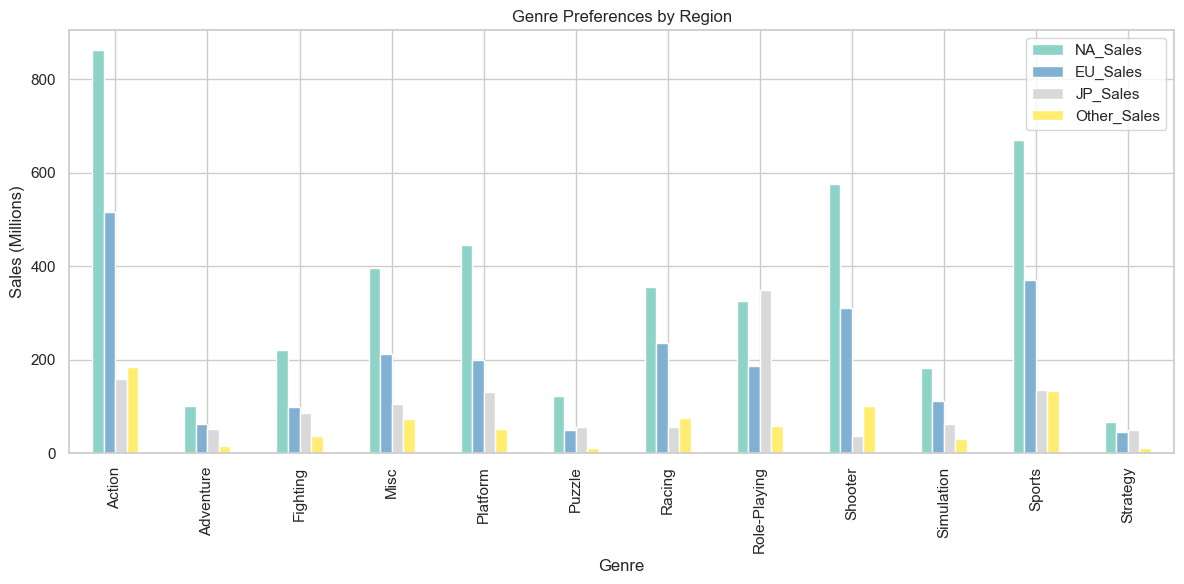

In [37]:
genre_region = sales_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

genre_region.set_index('Genre').plot(kind='bar', figsize=(12, 6), colormap='Set3')
plt.title('Genre Preferences by Region')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()


18. What’s the yearly sales change per region?

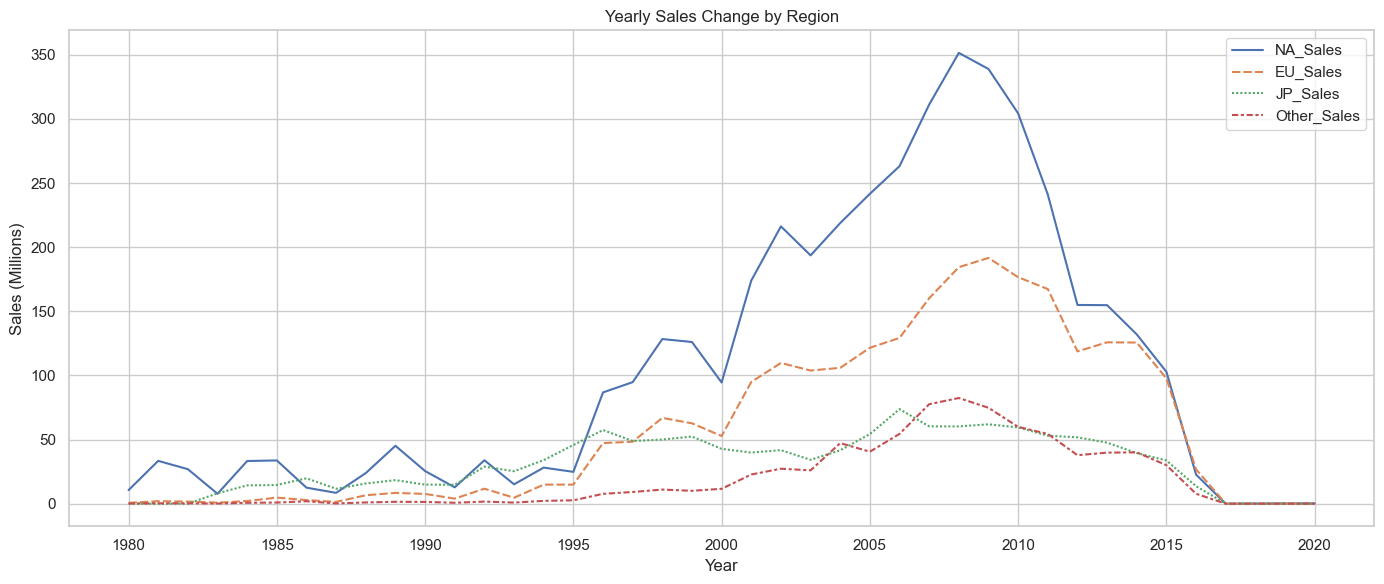

In [38]:
yearly_sales = sales_df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().dropna()

plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_sales)
plt.title('Yearly Sales Change by Region')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()


19. What is the average sales per publisher?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\2948733521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales.values, y=avg_sales.index, palette='viridis')


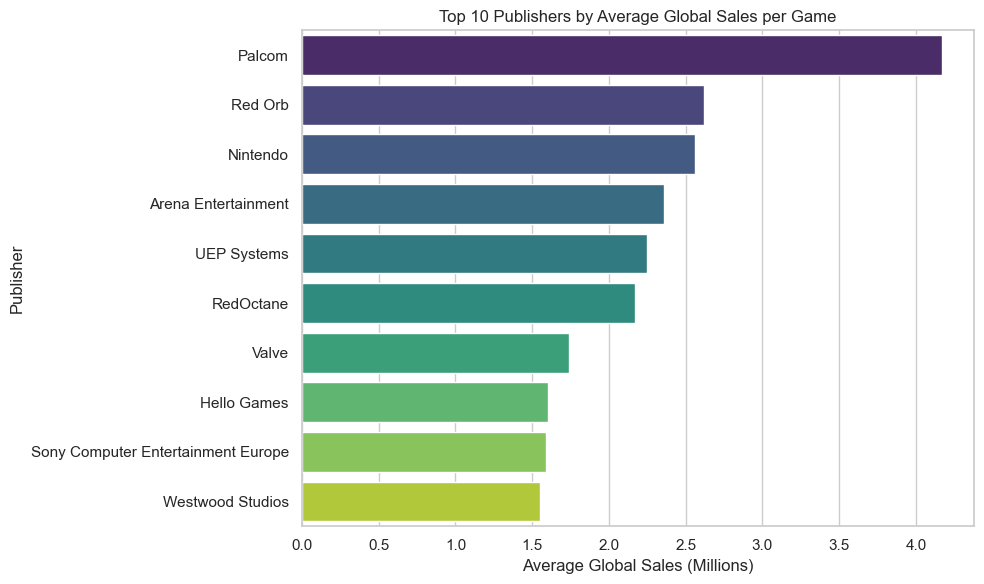

In [39]:
avg_sales = sales_df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales.values, y=avg_sales.index, palette='viridis')
plt.title('Top 10 Publishers by Average Global Sales per Game')
plt.xlabel('Average Global Sales (Millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


20. What are the top 5 best-selling games per platform?

C:\Users\Ansha\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\164644805.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


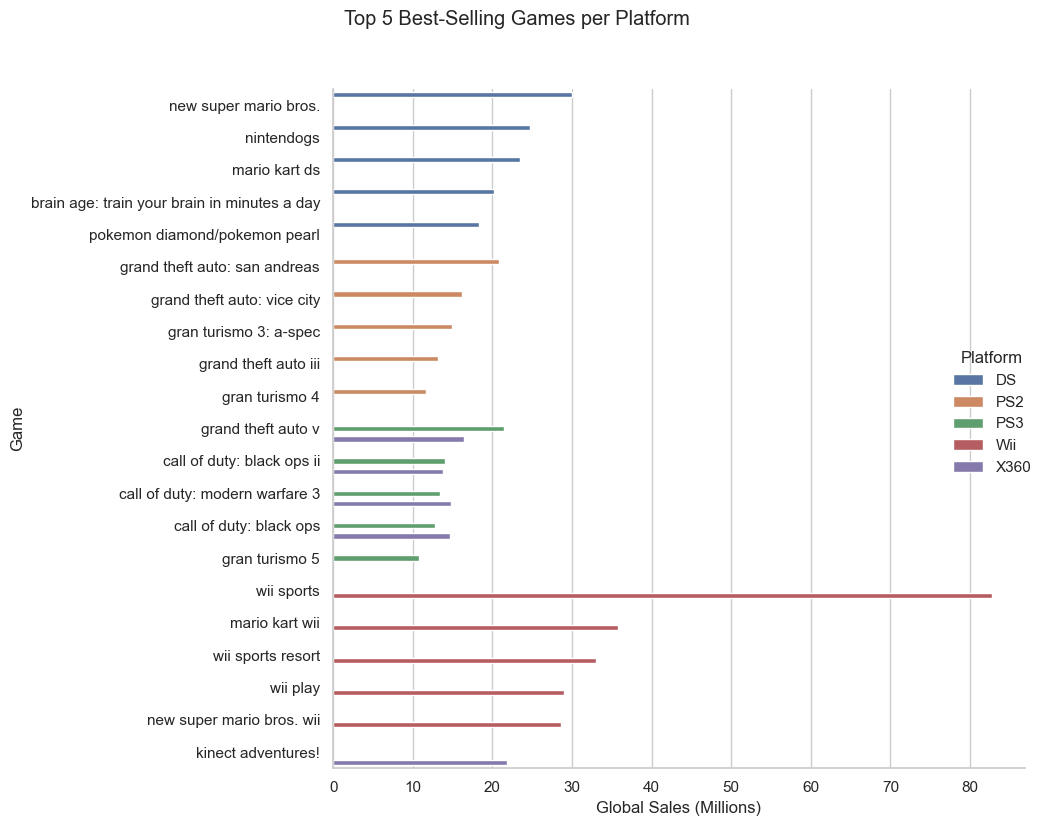

In [41]:
top_platforms = sales_df['Platform'].value_counts().head(5).index
top_games_per_platform = sales_df[sales_df['Platform'].isin(top_platforms)]

g = sns.catplot(
    data=top_games_per_platform.groupby('Platform').apply(lambda x: x.nlargest(5, 'Global_Sales')).reset_index(drop=True),
    x='Global_Sales', y='Title', hue='Platform', kind='bar', height=8, aspect=1.2
)
g.set_axis_labels("Global Sales (Millions)", "Game")
g.fig.suptitle("Top 5 Best-Selling Games per Platform", y=1.03)
plt.tight_layout()
plt.show()


### Merging dataset

In [42]:
merged_df = pd.merge(games_df, sales_df, on='Title', how='inner')

21. Which game genres generate the most global sales?

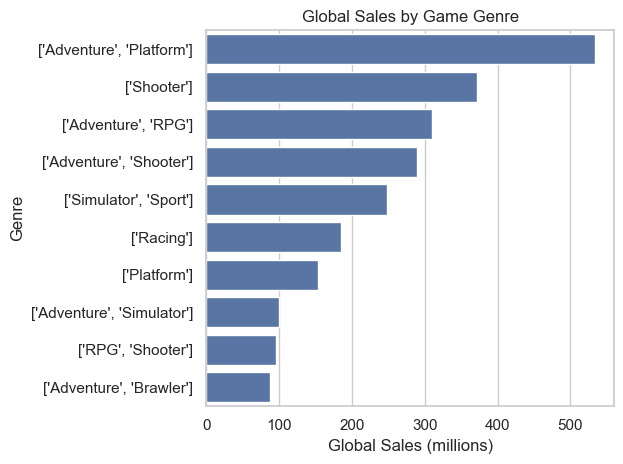

In [44]:
genre_sales = merged_df.groupby('Genres')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title('Global Sales by Game Genre')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


22. How does user rating affect global sales?

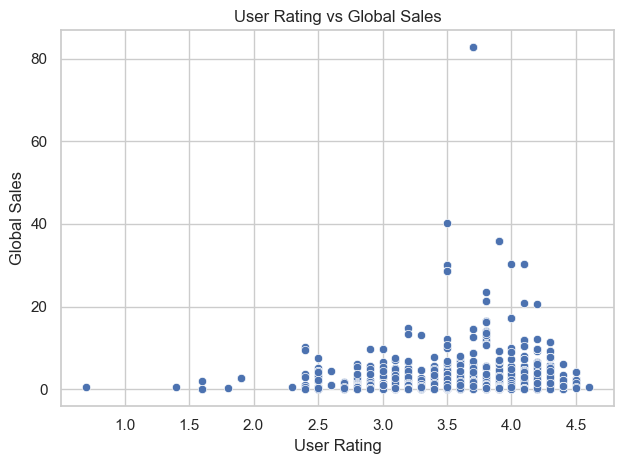

In [45]:
sns.scatterplot(data=merged_df, x='Rating', y='Global_Sales')
plt.title('User Rating vs Global Sales')
plt.xlabel('User Rating')
plt.ylabel('Global Sales')
plt.tight_layout()
plt.show()


23. Which platforms have the most games with high ratings (e.g., above 4)?

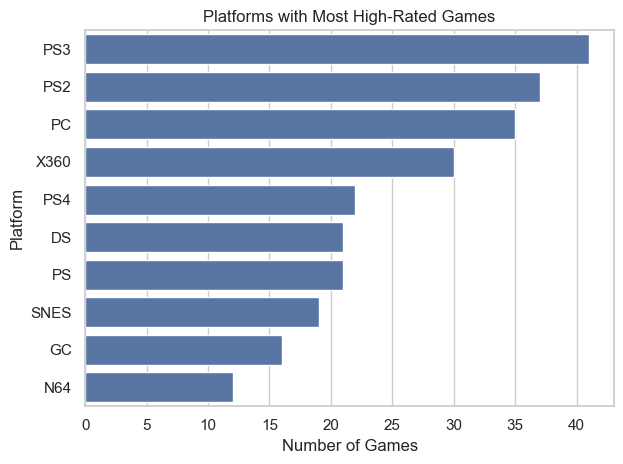

In [46]:
high_rated = merged_df[merged_df['Rating'] > 4]
platform_counts = high_rated['Platform'].value_counts().head(10)
sns.barplot(x=platform_counts.values, y=platform_counts.index)
plt.title('Platforms with Most High-Rated Games')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()


24. What’s the trend of releases and sales over time?

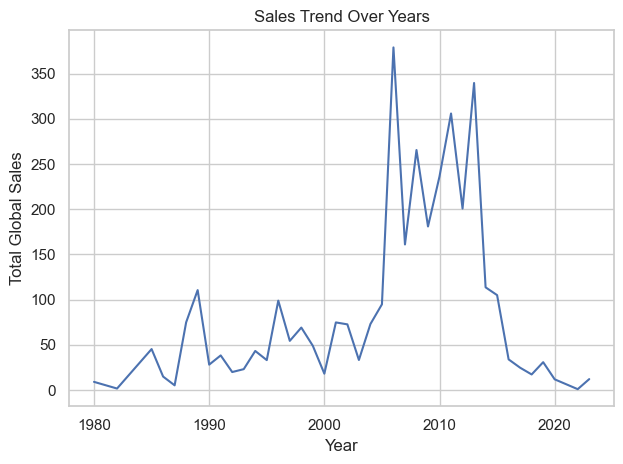

In [47]:
merged_df['Year'] = pd.to_datetime(merged_df['Release Date'], errors='coerce').dt.year
trend = merged_df.groupby('Year')['Global_Sales'].sum()
sns.lineplot(x=trend.index, y=trend.values)
plt.title('Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.tight_layout()
plt.show()


25. Do highly wishlisted games lead to more sales?

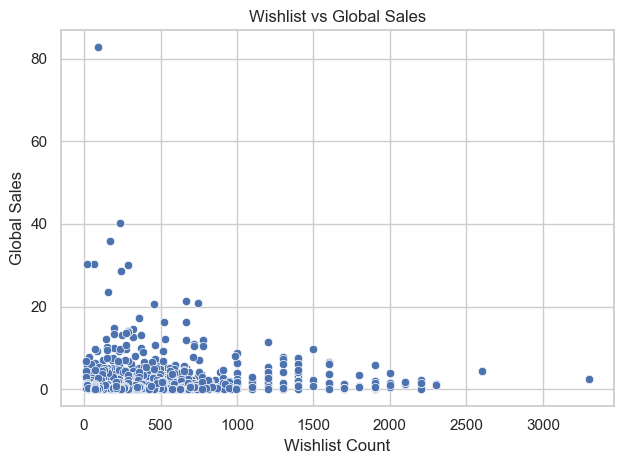

In [48]:
sns.scatterplot(data=merged_df, x='Wishlist', y='Global_Sales')
plt.title('Wishlist vs Global Sales')
plt.xlabel('Wishlist Count')
plt.ylabel('Global Sales')
plt.tight_layout()
plt.show()


26. Which genres have the highest engagement but lowest sales?

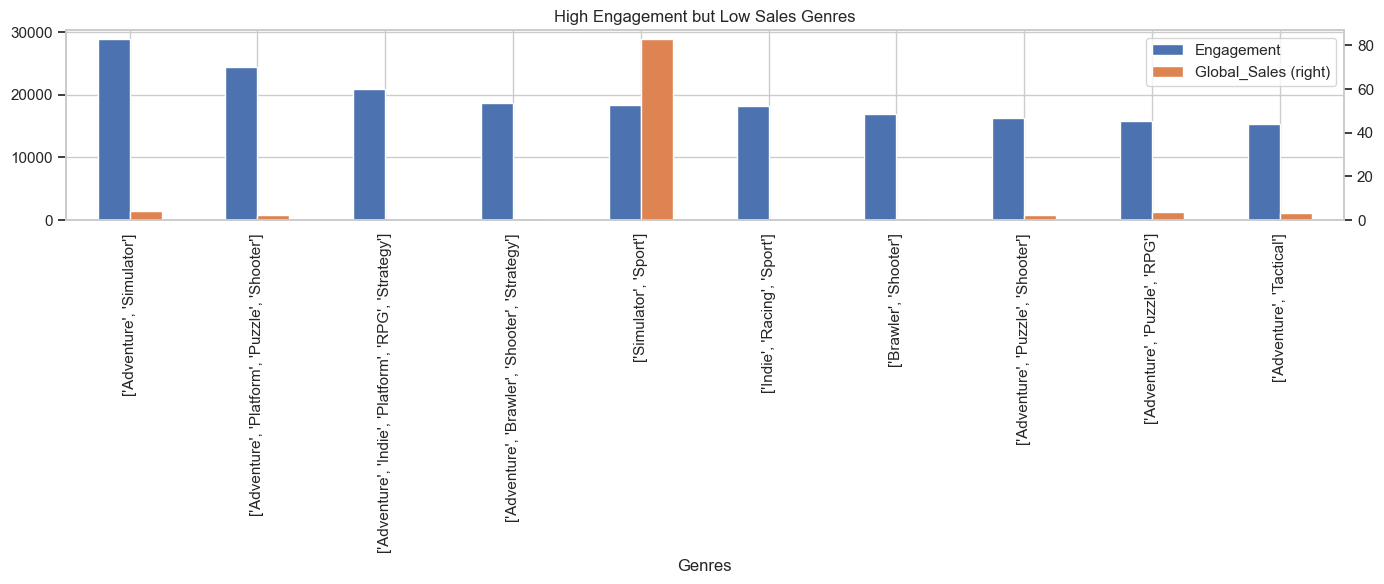

In [50]:
merged_df['Engagement'] = merged_df[['Plays', 'Playing', 'Backlogs']].sum(axis=1)
genre_compare = merged_df.groupby('Genres')[['Engagement', 'Global_Sales']].mean().sort_values(by='Engagement', ascending=False).head(10)
genre_compare[['Engagement', 'Global_Sales']].plot(kind='bar', figsize=(14,6), secondary_y='Global_Sales')
plt.title('High Engagement but Low Sales Genres')
plt.tight_layout()
plt.show()


27. Do highly listed games (wishlist/backlogs) correlate with better ratings?

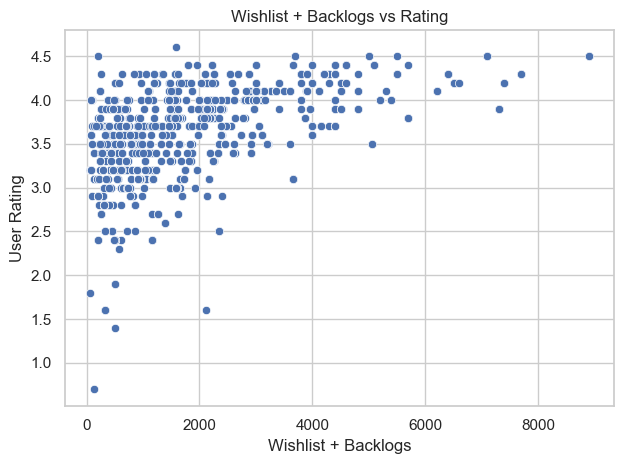

In [51]:
merged_df['Wishlist_Backlogs'] = merged_df['Wishlist'] + merged_df['Backlogs']
sns.scatterplot(data=merged_df, x='Wishlist_Backlogs', y='Rating')
plt.title('Wishlist + Backlogs vs Rating')
plt.xlabel('Wishlist + Backlogs')
plt.ylabel('User Rating')
plt.tight_layout()
plt.show()


28. How does user engagement differ across genres?

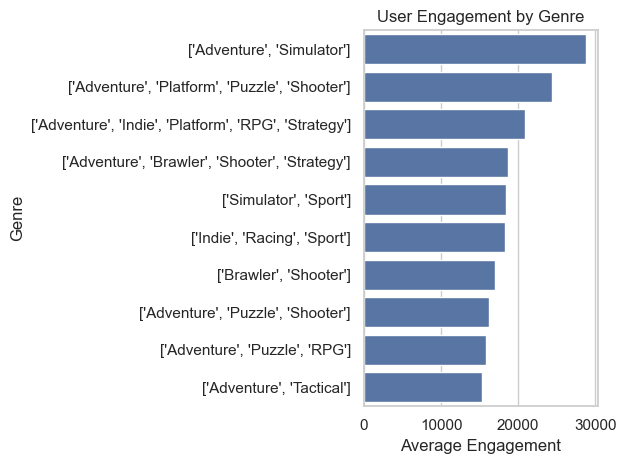

In [53]:
genre_engagement = merged_df.groupby('Genres')['Engagement'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_engagement.values, y=genre_engagement.index)
plt.title('User Engagement by Genre')
plt.xlabel('Average Engagement')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


29. What are the top-performing combinations of Genre + Platform?

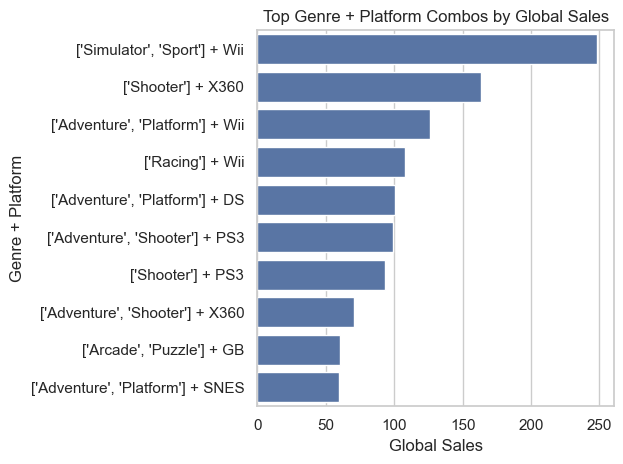

In [54]:
combo = merged_df.groupby(['Genres', 'Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=combo, x='Global_Sales', y=combo['Genres'] + ' + ' + combo['Platform'])
plt.title('Top Genre + Platform Combos by Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Genre + Platform')
plt.tight_layout()
plt.show()


30. What does a regional sales heatmap by genre reveal?

C:\Users\Ansha\AppData\Local\Temp\ipykernel_3164\1371463326.py:10: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from current font.
  plt.tight_layout()
C:\Users\Ansha\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


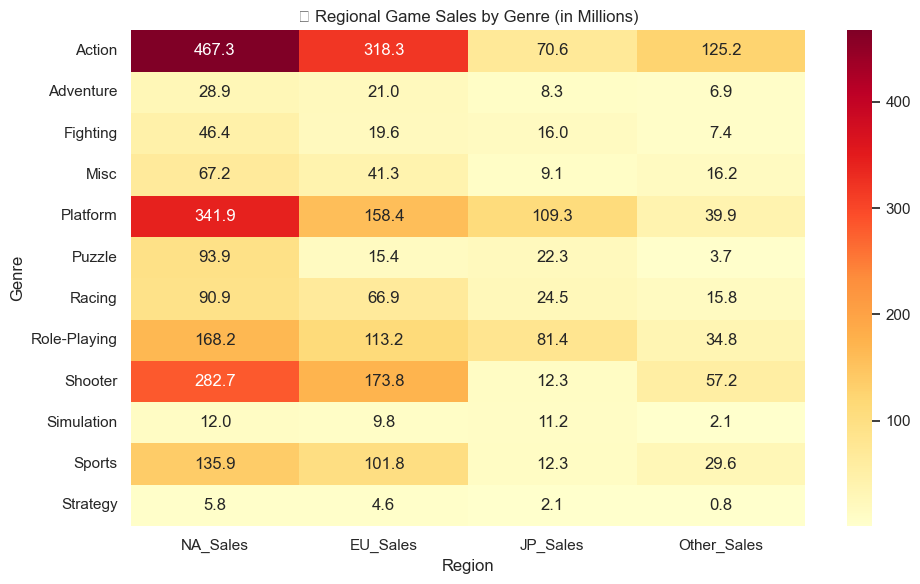

In [55]:
# Group by Genre and sum regional sales
regional_sales = merged_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(regional_sales, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title('🎮 Regional Game Sales by Genre (in Millions)')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()